# Pandas Intro

## Install and run pandas

In [1]:
!pip install pandas

## you can try following if pip not work

## py -m pip install ... always works on Windows (provided pip is installed)
## python -m pip install ... requires ...\Python3x to be in the PATH
## pip install ... requires ...\Python3x\Scripts to be in the PATH
## pip3 install ... for older version

import pandas as pd

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


## Series dan DataFrame

In [2]:
# Series dan data frame

# membuat series
A = [1,2,3]
series = pd.Series(A)

## membuat data frame dari series
B = ['A','B','A']
frame = { 'kolomA' : A, 'kolomB' : B }
data = pd.DataFrame(frame)
data

## membuat data frame
dataset = pd.DataFrame(data = {
    'koloma' : [1,2,3],
    'kolomb' : ['A','A','B']})

## cek tipe data
type(series)
type(dataset)

## melihat data
print(data)
print(dataset)

## atau cukup
dataset ## temporary view

   kolomA kolomB
0       1      A
1       2      B
2       3      A
   koloma kolomb
0       1      A
1       2      A
2       3      B


,koloma,kolomb
0,1,A
1,2,A
2,3,B


## load data

In [3]:
## Working with pandas

## checking working directory is important!
## working directory is a place where you work
import os

## get wd
os.getcwd()

## change wd
## os.chdir('../Bootcamp-Python4DA/') 
## os.chdir('../pandas intro and eda hackatlon/')

df = pd.read_csv("titanic.csv")

## read from link? use pd.read_csv('http://samplelink/samplefile.csv') ex. amazon aws link

## absolute vs relative path
path = "../pandas intro and eda hackatlon/" ## this is absolute path
path2 = "/Users/alannurcahyo/Documents/bahan ngajar hack dan kelas DA/" ## this is relative path (big no)
# pd.read_csv("../") ... upper one step from home directory
# pd.read_csv("~/") ... root
## safe bet is to copy paste your data on current wd

## pd.read_excel("path") ## might nee to !pip install xlrd, or openpyxl
## pd.read_html("path") etc...

## Reading .txt? you can use read_csv to read .txt file too
df2 = pd.read_csv("titanic.txt", sep = ",") ## by default sep/separator/delimiter is comma (,) 
## however separator can be | , : ; tabs, space (even regex!) etc. 
df2.head(3)

## help 
pd.read_csv?

## using collab?
## from google.colab import files
## files.upload()

## Sekilas Pandas

In [4]:
#### mengakses kolom atau baris
## select columns
# using '.'
df.Fare
# or using []
df['Pclass']
# using extra `[]` <- untuk lebih dari satu kolom
df[['Age','Pclass']]

## filter rows with index number
df.iloc[0:10,]
# or
df.loc[0:10:2,]

### select columns and rows
## using loc for names
df.loc[0:10, 'Cabin']
df.loc[0:10,'PassengerId':'Cabin']
df.loc[0:10:2,['PassengerId','Name','Cabin']]

## using iloc for index number
df.iloc[0:10,0:3]
df.iloc[0:10, [0,3,2,1]] #personally I would strongly suggest againts hard coding


## Conditional filter vs querry
#### conditional
df[df.Age >10]
# or use querry
df.query('Age < 10')

## Sorting Data

# sort based on column
df.sort_values('Age', ascending = False)

#two or more col
df.sort_values(['Age','Pclass', 'Sex'], ascending = (True,False,True))

## group by
# Kelompokan berdasarkan embark_town
df_grouped = df.groupby(['Embarked']).mean()
# Aggregate functions: count(), mean(), sum(), min(), max(), median(), quantile(), var(), std()

# Melihat value pada group embark_town
gb = df.groupby(['Embarked'])
gb.get_group('C')

# help?
pd.DataFrame.sort_values?
pd.DataFrame.head?
pd.DataFrame.info?
## etc...

## Save Output

In [5]:
# Saving/Exporting Data
df.to_csv('df.csv')

# Exploratory Data Analysis - Kelas DA 28 Juli 2021

## Outline


    1. Pendahuluan EDA
    2. Importing Data
    3. Data Understanding (tipe data, null values, duplikasi, variable selection, dsj)
    4. Noise vs Outliers
    5. Missing Values dan Imputasi
    6. Basic Statistics
    7. Visualisasi


## 1. Pendahuluan EDA
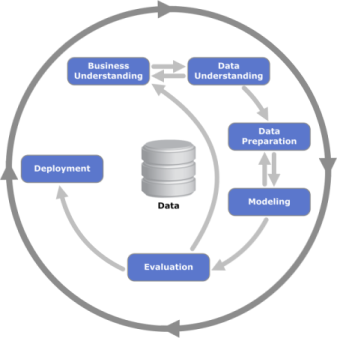

Data Understanding: Relevance
* Data apa yang tersedia?
* Seberapa banyak (dan lama) data tersedia?
* Ada yang memiliki label? (Variabel Target)
* Apakah data ini relevan? Atau bisa dibuat relevan?
* Bagaimana dengan kualitas data ini?
* Ada data tambahan (eksternal)?
* Siapa yang memahami tentang data ini dengan baik?


## EDA ?
* EDA menjadi tahapan awal dari sebagian besar proses analisis data, tahap yang menentukan seberapa baik analisis data selanjutnya akan dihasilkan.
* Kemampuan untuk melakukan EDA dengan baik merupakan syarat dasar terkait dengan pengolahan data, baik itu *business intelligence, data analyst, data scientist*, dsb
* EDA meliputi preprocessing, perhitungan statistik dasar, visualisasi, penyusunan hipotesis (dugaan awal), pemeriksaan asumsi, hingga story-telling dan reporting. Di dalamnya juga termasuk proses penanganan missing values, outlier, reduksi dimensi, pengelompokkan, transformasi dan distribusi data.

* Tools: Python, R, S-Plus, etc

## Tujuan EDA
1. Menarik hipotesis tentang penyebab fenomena yang diamati
2. Menilai asumsi yang menjadi dasar inferensi statistik
3. Mendukung pemilihan teknik statistik yang tepat
4. Memberikan dasar untuk pengumpulan data lebih lanjut


Ref : John Tukey (1961)

# EDA dengan dataset Titanic

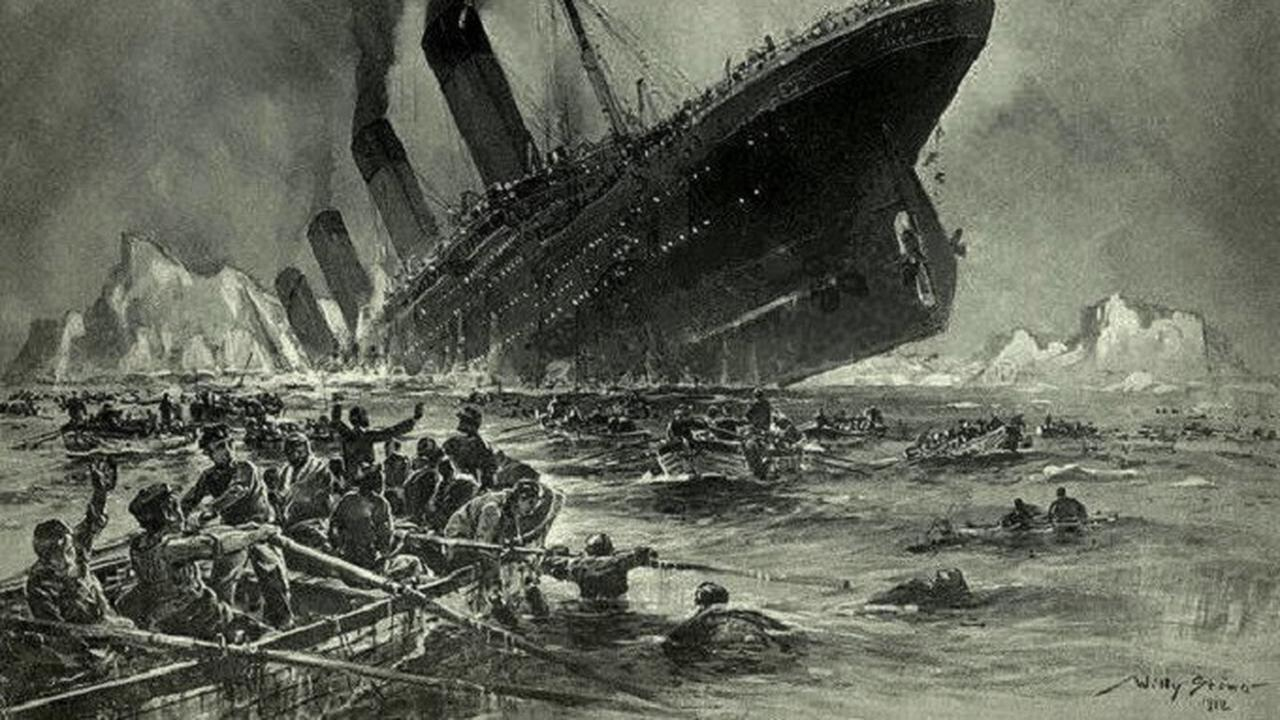

"Tenggelamnya Titanic" karya Willy Stöwer (The Vintage)

## 2. Importing Data

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('titanic.csv')

## 3. Data Understanding

## "mengintip" data

In [8]:
data.head()
#data.tail()
#data.sample()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## mencari informasi data

In [9]:
data.shape
data.size
data.columns
data.index
data.dtypes
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

-dataset mempunyai 891 row dan 12 kolom

## Cek Missing Value, Data Duplicated

In [10]:
data.isnull().sum() #atau data.isna().sum()
data.isnull().sum()*100/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# cek dupliaksi row data
data.duplicated().sum()

# cek dupliksi tiap kolom
data.Ticket.duplicated().sum()

210

##  mengecek label/variabel target

In [12]:
data.Survived.unique()

array([0, 1])

In [13]:
# mengecek data unik pada 'Cabin'



data pada kolom 'Age' dan 'Cabin' membutuhkan perhartian lebih di fase berikutnya

## statistik dasar

In [14]:
## diskripsi untuk data numerik
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
## diskripsi untuk data kategorikal
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bradley, Mr. George (""George Arthur Brayton"")",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


<details>
Asumsi setelah melakukan analisis dasar

1. Korelasi: mengetahui seberapa kuat setiap fitur berkorelasi dengan 'Survived'
2. Kelengkapan : fitur 'Age' dan 'Embarked' perlu dilengkapi karena mempunyai kemungkinan berkorelasi dengan 'Survived'
3. Keakuratan : 
    * 'PassengerId' dapat dikeluarkan karena tidak berkontribusi pada keselamatan.
    * 'Ticket' terdapat dupliksi cukup banyak dan tidak berkontribusi pada keselamatan.
    * 'Cabin' terlalu banyak "null values"
    * 'Name' unik dan tidak standar, namun tidak memiliki "null values" dan terdapat titel standar
4. Enginering :
    * 'SibSp' dan 'Parch' dapat digunakan untuk membuat fitur keluarga, kemungkinan berkorelasi dengan 'Survived'
    * 'Name' dapat dilakukan ekstraksi untuk mengeluarkan titel
    * 'Age' dapat dikelompokkan menjadi ordinal kategori
    * 'Fare' dapat dikelompokkan menjadi ordinal kategori
5. Perempuan, anak-anak, orang kaya lebih mungkin untuk bertahan hidup.
</details>

In [16]:
## correlation
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


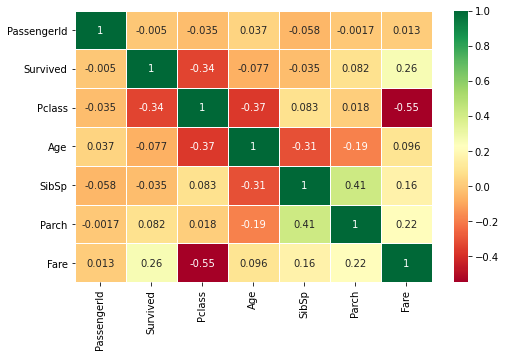

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

-terdapat 2 fitur, 'Pclass' dan 'Fare' yang saling berkorelasi

## Eksplorasi Variabel

In [18]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

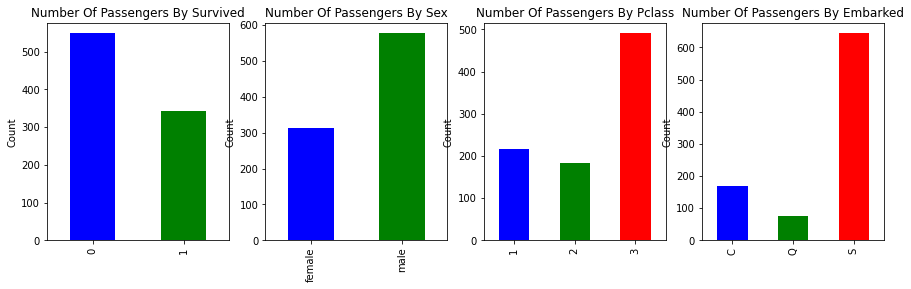

In [19]:
f,ax=plt.subplots(1,4,figsize=(15,4))

# subplot 1
data['Survived'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Survived')
ax[0].set_ylabel('Count')


# subplot 2 
data['Sex'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[1])
ax[1].set_title('Number Of Passengers By Sex')
ax[1].set_ylabel('Count')

# subplot 3 
data['Pclass'].value_counts().sort_index().plot.bar(color=['blue','green','red'],ax=ax[2])
ax[2].set_title('Number Of Passengers By Pclass')
ax[2].set_ylabel('Count')

# subplot 4 
data['Embarked'].value_counts().sort_index().plot.bar(color=['blue','green','red','yellow'],ax=ax[3])
ax[3].set_title('Number Of Passengers By Embarked')
ax[3].set_ylabel('Count')

# show
plt.show()

Text(0.5, 1.0, 'Fare from the Titanic')

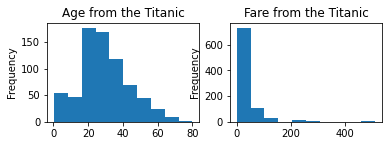

In [20]:
plt.subplot(2,2,1)
data.Age.plot.hist()
plt.title('Age from the Titanic')

plt.subplot(2,2,2)
data.Fare.plot.hist()
plt.title('Fare from the Titanic')


### Outliers

Text(0.5, 1.0, 'Fare from the Titanic')

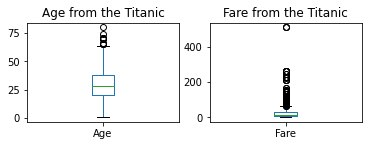

In [21]:
plt.subplot(2,2,1)
data['Age'].plot.box()
plt.title('Age from the Titanic')

plt.subplot(2,2,2)
data['Fare'].plot.box()
plt.title('Fare from the Titanic')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

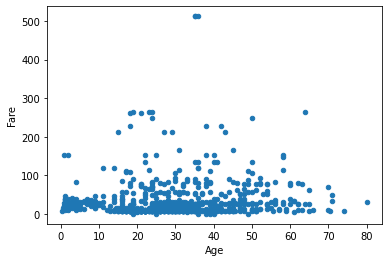

In [22]:
data.plot.scatter('Age', 'Fare')

#### Kesimpulan Sementara
    - jumlah penumpang survived lebih banyak daripada unsurvived
    - jumlah penumpang male lebih banyak daripada penumpang female
    - jumlah penumpang kelas 3 lebih banyak daripada kelas lainnya
    - jumlah penumpang dengan Embarked Southampton lebih banyak daripada embarked lainnya
    - penumpang paling banyak berkisar pada usia 20 - 40 tahun

# Analisis Bivariat

In [23]:
data_ct_sex = pd.crosstab(data['Sex'], data['Survived'],margins=True)
data_ct_sex.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [24]:
data_ct_pclass = pd.crosstab(data['Pclass'], data['Survived'],margins=True)
data_ct_pclass.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
data_ct_embarked = pd.crosstab(data['Embarked'], data['Survived'],margins=True)
data_ct_embarked.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [26]:
from scipy.stats import chi2_contingency
  
def chi_test(data):    
    # defining the table
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

chi_test(data_ct_sex)
chi_test(data_ct_pclass)
chi_test(data_ct_embarked)

p value is 1.0036732821369117e-55
Dependent (reject H0)
p value is 6.258462423531468e-20
Dependent (reject H0)
p value is 0.00018045058101554055
Dependent (reject H0)


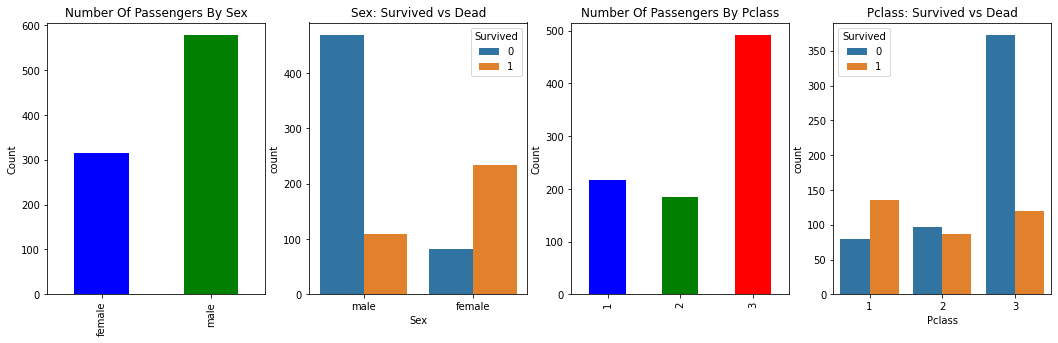

In [27]:
f,ax=plt.subplots(1,4,figsize=(18,5))

# subplot 1
data['Sex'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('Count')


# subplot 2 
sns.countplot('Sex',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

# subplot 3
data['Pclass'].value_counts().sort_index().plot.bar(color=['blue','green','red'],ax=ax[2])
ax[2].set_title('Number Of Passengers By Pclass')
ax[2].set_ylabel('Count')

# subplot 4 
sns.countplot('Pclass',hue='Survived',data=data, ax=ax[3])
ax[3].set_title('Pclass: Survived vs Dead')


# show
plt.show()

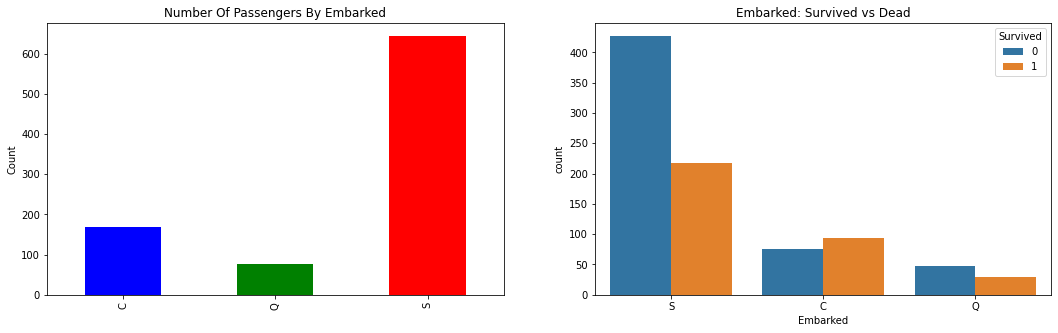

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,5))

# subplot 1
data['Embarked'].value_counts().sort_index().plot.bar(color=['blue','green','red'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Embarked')
ax[0].set_ylabel('Count')

# subplot 2 
sns.countplot('Embarked',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Embarked: Survived vs Dead')

plt.show()

kesimpulan
- Jumlah pria di kapal jauh lebih banyak daripada jumlah wanita. Namun jumlah wanita yang diselamatkan lebih banyak jumlah pria yang diselamatkan.
- Jenis kelamin mungkin menjadi variabel yang menentukan keselamatan
- 'Sex' kemungkinan menjadi fitur yang **penting** untuk pemodelan

- Penumpang Pclass 1 mempunyai angka keselamatan yang tinggi. Meski jumlah Penumpang di Pclass 3 jauh lebih tinggi, namun angka keselamatan dari mereka rendah.
- Kelas kabin mungkin menjadi variabel yang menentukan keselamatan 
- 'Pclass' kemungkinan menjadi fitur yang **penting** untuk pemodelan

- Pelabuhan keberangkatan tidak menunjukkan pola yang menjadi penentu keselamatan
- 'Embarked' kemungkinan menjadi fitur yang **tidak terlalu penting** untuk pemodelan